In [1]:
from similarityfunctions import *
import networkx as nx

In [4]:
dg = makeDirectedGraph(5, 2)

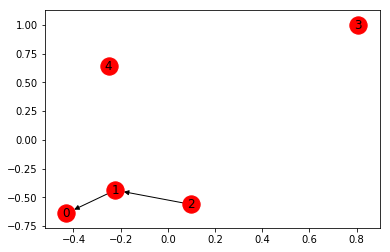

In [5]:
nx.draw_networkx(dg)

In [8]:
# add observations to a graph
def observeData(graph, true_nodes, false_nodes):
    for i in true_nodes:
        graph.nodes[i]['observed'] = True
    for i in false_nodes:
        graph.nodes[i]['observed'] = False

In [15]:
observeData(dg, [1, 4], [3])

In [16]:
dg.nodes.data()

NodeDataView({0: {}, 1: {'observed': True}, 2: {}, 3: {'observed': False}, 4: {'observed': True}})

In [57]:
# adds new true nodes and new false nodes to the graph and then checks for contradictions
# only finds direct contraidctions? Should talk with group about this.
import copy 
def findContradictions(graph, new_true_nodes, new_false_nodes, threshold=.5):
    new_g = copy.deepcopy(graph)
    observeData(new_g, new_true_nodes, new_false_nodes)
    edge_attrs = nx.get_edge_attributes(new_g, 'weight')
    for i in new_g.nodes():
        if 'observed' in new_g.nodes.data()[i]:
            if new_g.nodes.data()[i]['observed'] is False:
                for x in edge_attrs:
                    if 'observed' in new_g.nodes.data()[x[1]]:
                        if x[0] == i and new_g.nodes.data()[x[1]]['observed'] is True:
                            return (i, False, x[1], True, edge_attrs[x])
            if new_g.nodes.data()[i]['observed'] is True:
                for x in edge_attrs:
                    print(x, x[1], new_g.nodes.data()[x[1]], edge_attrs[x])
                    if 'observed' in new_g.nodes.data()[x[1]]:
                        if x[0] == i and new_g.nodes.data()[x[1]]['observed'] is False and edge_attrs[x] >= threshold:
                            return (i, True, x[1], False, edge_attrs[x])
    return "No contradictions found"

In [58]:
findContradictions(dg, [], [0])

0
{'observed': False}
1
{'observed': True}
(1, 0) 0 {'observed': False} 0.8951926670840743


(1, True, 0, False, 0.8951926670840743)